<a href="https://colab.research.google.com/github/BinaryBeast-007/AI_for_Network_Security/blob/main/Classical_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path
dataset_path_train = "./KDDTrain+.txt"
dataset_path_test = "/content/KDDTest+.txt"
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
                "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
                "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
                "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
                "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "Label","class"]

data = pd.read_csv(dataset_path_train, header=None, names=column_names)
data_test= pd.read_csv(dataset_path_test, header=None, names=column_names)





In [40]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [41]:
data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [42]:
# Assuming your dataset has a 'Label' column indicating benign or attack
# For binary classification, create a binary label: 0 for benign, 1 for attack
data['BinaryLabel'] = (data['Label'] == 'normal').astype(int)

# For multi-class classification, you can use the 'Label' column directly
# If 'Label' is not in numeric format, you can use LabelEncoder to convert it
label_encoder = LabelEncoder()
categorical_features=['duration','protocol_type','service','flag']
data['hotduration']= label_encoder.fit_transform(data['duration'])
data['hotprotocol_type']=label_encoder.fit_transform(data['protocol_type'])
data['hotservice']=label_encoder.fit_transform(data['service'])
data['hotflag']=label_encoder.fit_transform(data['flag'])
data['MultiLabel'] = label_encoder.fit_transform(data['Label'])

reverse_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Map the encoded values in 'MultiLabel' column to original label names
data['OriginalLabel'] = data['MultiLabel'].map(reverse_mapping)

# Display the mapping
print("Encoded Values to Original Label Names:")
print(data[['MultiLabel', 'OriginalLabel']].drop_duplicates())

data = data.dropna()
data

Encoded Values to Original Label Names:
       MultiLabel    OriginalLabel
0              11           normal
2               9          neptune
13             21      warezclient
17              5          ipsweep
33             15        portsweep
46             20         teardrop
56             10             nmap
62             17            satan
138            18            smurf
211            14              pod
366             0             back
689             3     guess_passwd
2294            2        ftp_write
3005            8         multihop
3173           16          rootkit
5579            1  buffer_overflow
6086            4             imap
7040           22      warezmaster
10738          13              phf
16015           6             land
19448           7       loadmodule
21445          19              spy
66007          12             perl


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_rerror_rate,Label,class,BinaryLabel,hotduration,hotprotocol_type,hotservice,hotflag,MultiLabel,OriginalLabel
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,normal,20,1,0,1,20,9,11,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,normal,15,1,0,2,44,9,11,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,neptune,19,0,0,1,49,5,9,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.01,normal,21,1,0,1,24,9,11,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,normal,21,1,0,1,24,9,11,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,neptune,20,0,0,1,49,5,9,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.00,normal,21,1,8,2,49,9,11,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.00,normal,18,1,0,1,54,9,11,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.00,neptune,20,0,0,1,30,5,9,neptune


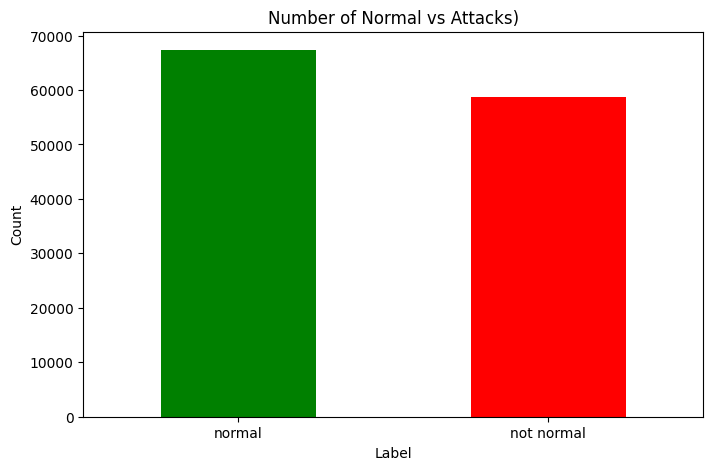

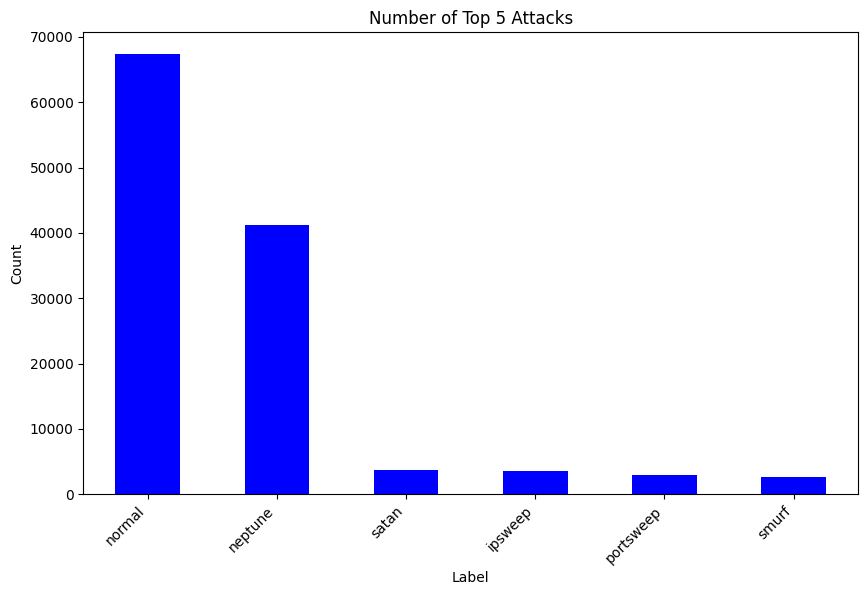

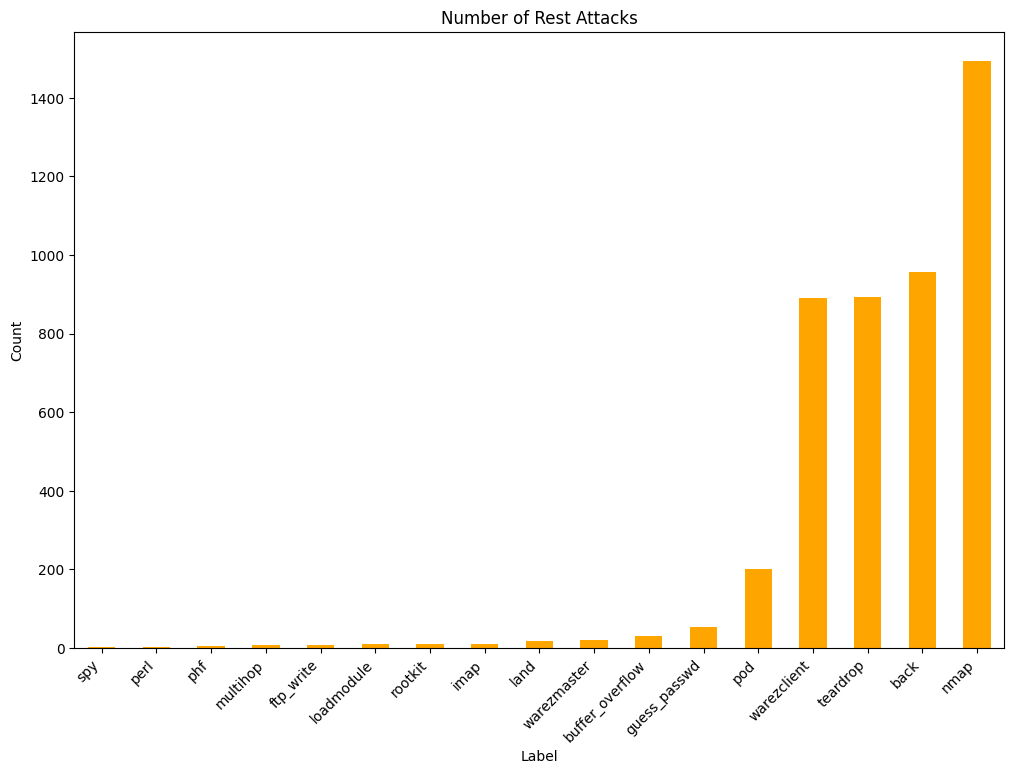

In [43]:
# Assuming 'data' is your original DataFrame

# 1) Number of Normal vs. Attack
normal_vs_not_normal_counts = data['OriginalLabel'].apply(lambda x: 'normal' if x == 'normal' else 'not normal')
normal_vs_not_normal_counts = normal_vs_not_normal_counts.value_counts()
plt.figure(figsize=(8, 5))
normal_vs_not_normal_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Number of Normal vs Attacks)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 2) Number of Top 5 Attacks
top_attacks_counts = data['OriginalLabel'].value_counts().nlargest(6)
plt.figure(figsize=(10, 6))
top_attacks_counts.plot(kind='bar', color='blue')
plt.title('Number of Top 5 Attacks')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3) Number of Rest Attacks
rest_attacks_counts = data['OriginalLabel'].value_counts().nsmallest(17)
plt.figure(figsize=(12, 8))
rest_attacks_counts.plot(kind='bar', color='orange')
plt.title('Number of Rest Attacks')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
# Assuming your dataset has a 'Label' column indicating benign or attack
# For binary classification, create a binary label: 0 for benign, 1 for attack
data_test['BinaryLabel'] = (data_test['Label'] == 'normal').astype(int)

# For multi-class classification, you can use the 'Label' column directly
# If 'Label' is not in numeric format, you can use LabelEncoder to convert it
label_encoder = LabelEncoder()
categorical_features=['duration','protocol_type','service','flag']
data_test['hotduration']= label_encoder.fit_transform(data_test['duration'])
data_test['hotprotocol_type']=label_encoder.fit_transform(data_test['protocol_type'])
data_test['hotservice']=label_encoder.fit_transform(data_test['service'])
data_test['hotflag']=label_encoder.fit_transform(data_test['flag'])
data_test['MultiLabel'] = label_encoder.fit_transform(data_test['Label'])

data_test = data.dropna()
data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_rerror_rate,Label,class,BinaryLabel,hotduration,hotprotocol_type,hotservice,hotflag,MultiLabel,OriginalLabel
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,normal,20,1,0,1,20,9,11,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,normal,15,1,0,2,44,9,11,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,neptune,19,0,0,1,49,5,9,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.01,normal,21,1,0,1,24,9,11,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,normal,21,1,0,1,24,9,11,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,neptune,20,0,0,1,49,5,9,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.00,normal,21,1,8,2,49,9,11,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.00,normal,18,1,0,1,54,9,11,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.00,neptune,20,0,0,1,30,5,9,neptune


In [45]:
# 9 Neptune, 5 ipsweep, 17 satan, 18 smurf,15 portsweep

In [46]:
# Features and labels for binary classification
X_binary = data.drop(['Label', 'BinaryLabel','duration','protocol_type','service','flag','MultiLabel','OriginalLabel'], axis=1)
y_binary = data['BinaryLabel']

# Split the data into training and testing sets
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

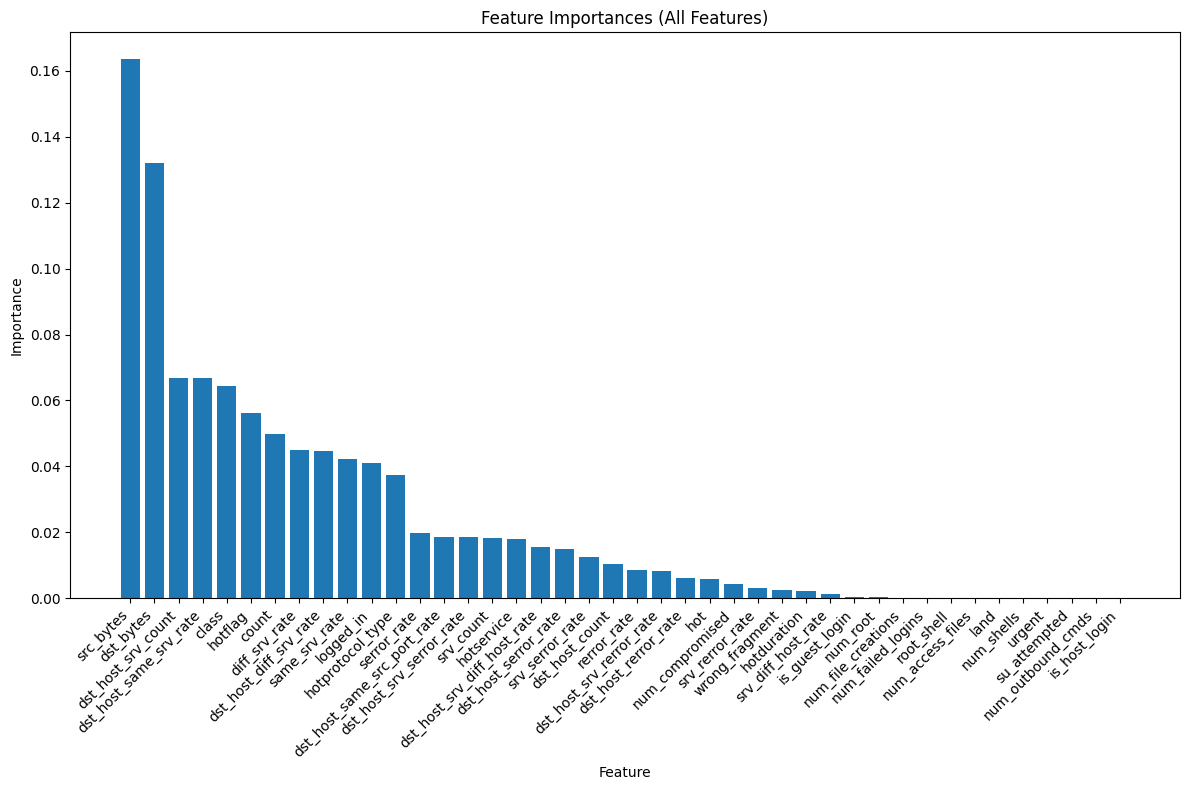

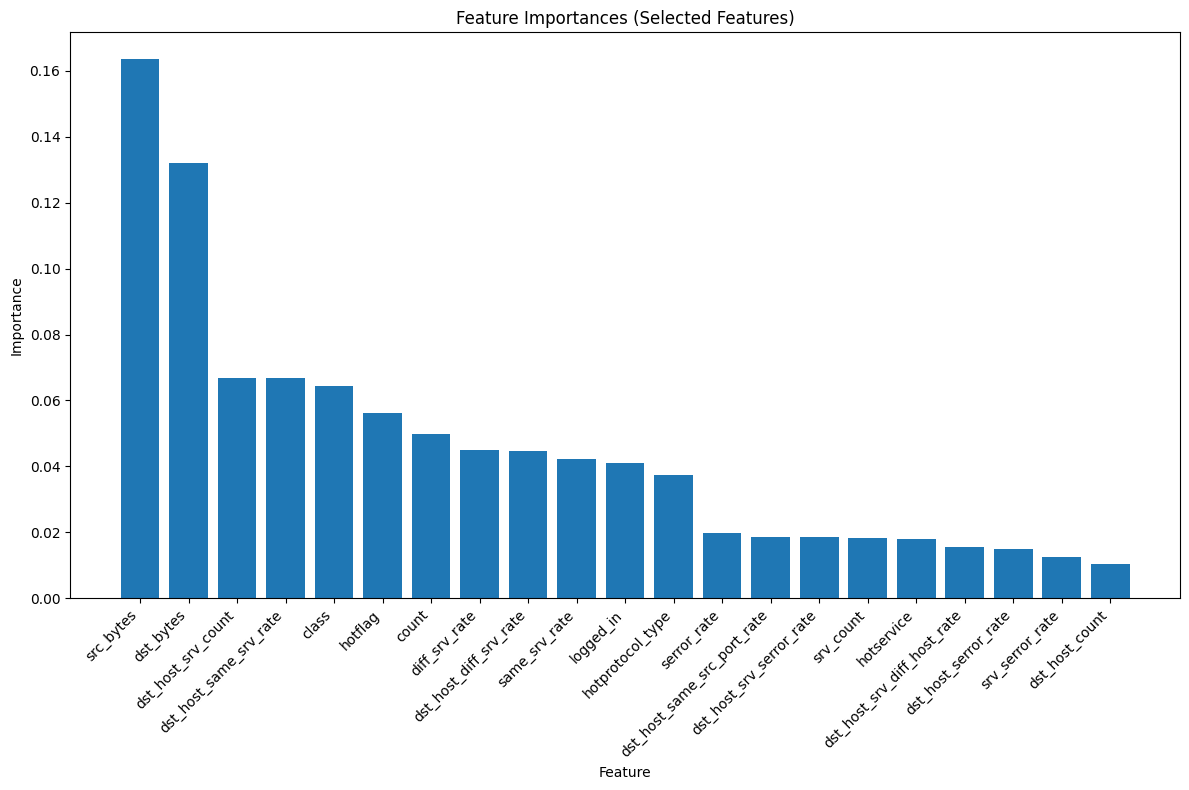

Feature Importances for All Features:
src_bytes: 0.1634601434888159
dst_bytes: 0.13199834700509172
dst_host_srv_count: 0.0668886451867788
dst_host_same_srv_rate: 0.06670475737605822
class: 0.06434459598439933
hotflag: 0.05624406433489907
count: 0.049712375470488825
diff_srv_rate: 0.04489973473083183
dst_host_diff_srv_rate: 0.04460067673591666
same_srv_rate: 0.04238312416268691
logged_in: 0.040997257246689726
hotprotocol_type: 0.03737043453873919
serror_rate: 0.019944459275128595
dst_host_same_src_port_rate: 0.018628470010880728
dst_host_srv_serror_rate: 0.018489703793078602
srv_count: 0.018401961926341654
hotservice: 0.018029969901553047
dst_host_srv_diff_host_rate: 0.015601581994826277
dst_host_serror_rate: 0.014825244818050217
srv_serror_rate: 0.012413577418147536
dst_host_count: 0.010496771832393455
rerror_rate: 0.008517091331177392
dst_host_srv_rerror_rate: 0.008213710829161865
dst_host_rerror_rate: 0.006253716852424724
hot: 0.005870945236133532
num_compromised: 0.00429804709895655

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [47]:
# Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_binary, y_train_binary)

# Feature selection for both binary
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_train_binary, y_train_binary)

# Get the feature importances
feature_importances = rf.feature_importances_

# Get the selected features
selected_features = X_train_binary.columns[sfm.get_support()]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_binary.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar graph for all features
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (All Features)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the bar graph for selected features
selected_feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]
plt.figure(figsize=(12, 8))
plt.bar(selected_feature_importance_df['Feature'], selected_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Selected Features)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the importance for all features
print("Feature Importances for All Features:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

X_train_binary_selected = sfm.transform(X_train_binary)
X_test_binary_selected = sfm.transform(X_test_binary)



# Train and evaluate Random Forest for binary classification
rf_binary = RandomForestClassifier(n_estimators=100, random_state=42)
rf_binary.fit(X_train_binary_selected, y_train_binary)
y_pred_binary = rf_binary.predict(X_test_binary_selected)

print("Random Forest for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_binary))


# Naive Bayes for both binary and multi-class classification
nb_binary = GaussianNB()
nb_binary.fit(X_train_binary, y_train_binary)
y_pred_nb_binary = nb_binary.predict(X_test_binary)

print("Naive Bayes for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_nb_binary))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_nb_binary))


# Logistic Regression for both binary and multi-class classification
lr_binary = LogisticRegression(random_state=42)
lr_binary.fit(X_train_binary, y_train_binary)
y_pred_lr_binary = lr_binary.predict(X_test_binary)

print("Logistic Regression for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_lr_binary))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_lr_binary))

# AdaBoost Classifier
adaboost_model_binary = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model_binary.fit(X_train_binary, y_train_binary)
y_pred_adaboost = adaboost_model_binary.predict(X_test_binary)

print("Adaboost Classifier for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_adaboost))

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_binary, y_train_binary)
y_pred_knn = knn_model.predict(X_test_binary)

print("KNN Classifier for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_knn))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_knn))

# Create an MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train_binary, y_train_binary)
y_pred_mlp = mlp_model.predict(X_test_binary)

print("MLP Classifier for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_mlp))

# Create a QDA classifier
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_binary, y_train_binary)
y_pred_qda = qda_model.predict(X_test_binary)

print("QDA Classifier for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_qda))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_qda))

In [50]:
# Features and labels for binary classification
X_test_binary = data_test.drop(['Label', 'BinaryLabel','duration','protocol_type','service','flag','MultiLabel','OriginalLabel'], axis=1)
y_test_binary = data_test['BinaryLabel']

In [51]:
X_train_binary_selected = sfm.transform(X_train_binary)
X_test_binary_selected = sfm.transform(X_test_binary)

# Train and evaluate Random Forest for binary classification

y_pred_binary = rf_binary.predict(X_test_binary_selected)

print("Random Forest for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_binary))


# Naive Bayes for both binary and multi-class classification

y_pred_nb_binary = nb_binary.predict(X_test_binary)

print("Naive Bayes for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_nb_binary))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_nb_binary))


# Logistic Regression for both binary and multi-class classification

y_pred_lr_binary = lr_binary.predict(X_test_binary)

print("Logistic Regression for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_lr_binary))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_lr_binary))

# AdaBoost Classifier

y_pred_adaboost = adaboost_model_binary.predict(X_test_binary)

print("Adaboost Classifier for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_adaboost))

# Create a KNN classifier

y_pred_knn = knn_model.predict(X_test_binary)

print("KNN Classifier for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_knn))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_knn))

# Create an MLP classifier

y_pred_mlp = mlp_model.predict(X_test_binary)

print("MLP Classifier for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_mlp))

# Create a QDA classifier

y_pred_qda = qda_model.predict(X_test_binary)

print("QDA Classifier for Binary Classification:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_qda))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_qda))

Random Forest for Binary Classification:
Accuracy: 0.999920617910187
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58630
           1       1.00      1.00      1.00     67343

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973

Naive Bayes for Binary Classification:
Accuracy: 0.5374326244512713
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.01      0.03     58630
           1       0.54      0.99      0.70     67343

    accuracy                           0.54    125973
   macro avg       0.58      0.50      0.36    125973
weighted avg       0.58      0.54      0.39    125973

Logistic Regression for Binary Classification:
Accuracy: 0.8709167837552492
Classification Report:
               precision    recall  f1-score   support

      

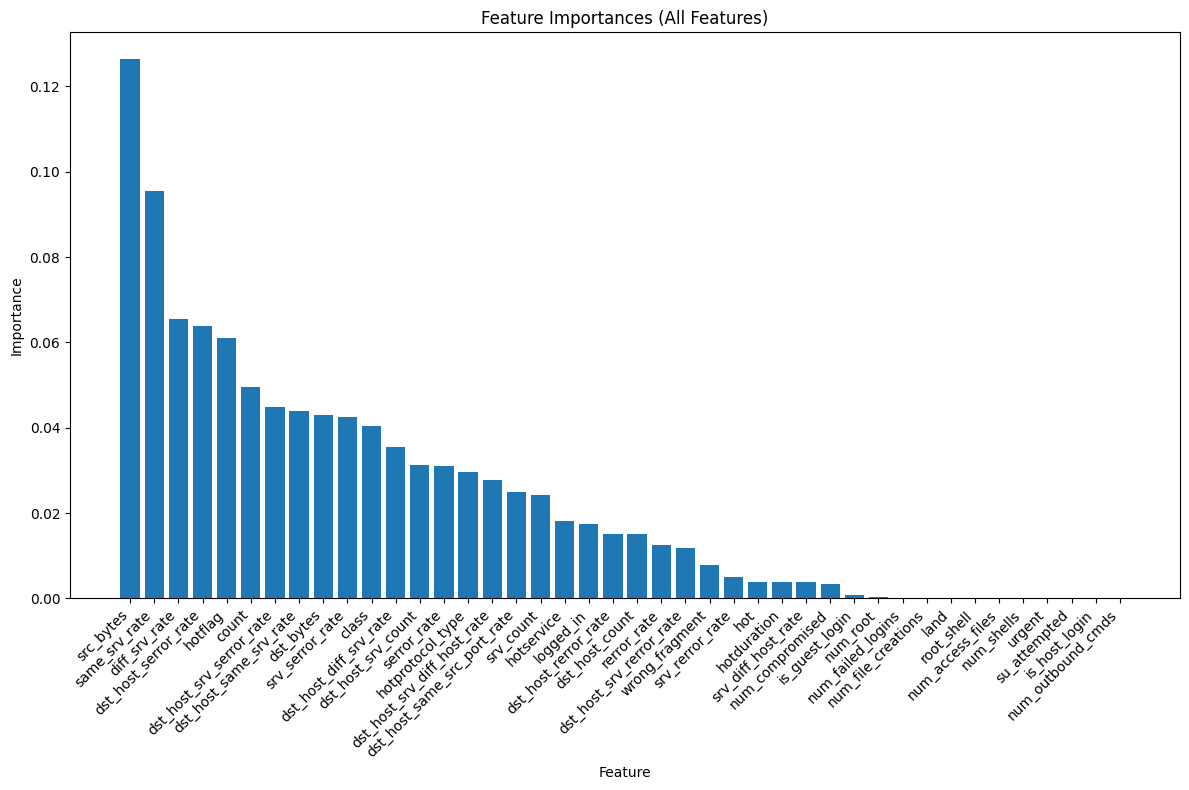

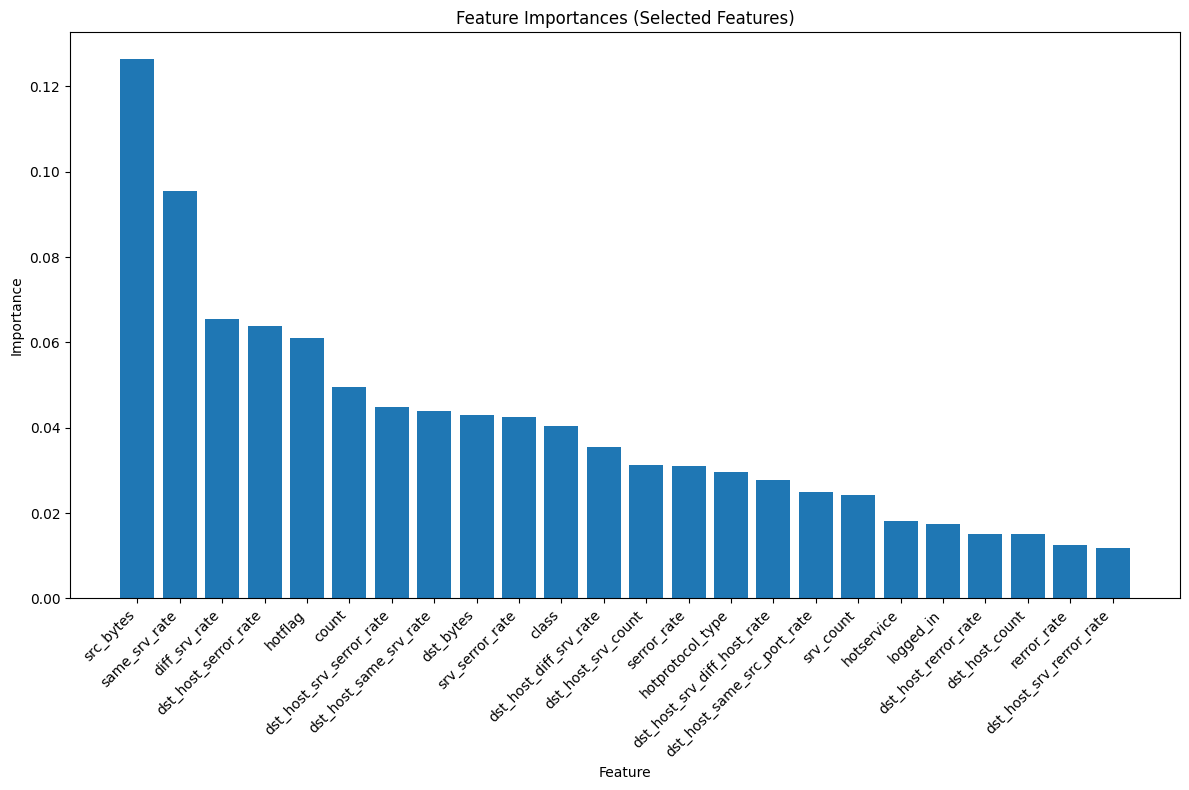

Feature Importances for All Features:
src_bytes: 0.126372799464258
same_srv_rate: 0.09554333231236498
diff_srv_rate: 0.06546981201103548
dst_host_serror_rate: 0.06391773714625995
hotflag: 0.06091675897983448
count: 0.049640927870272245
dst_host_srv_serror_rate: 0.04495965539066014
dst_host_same_srv_rate: 0.04394562333760222
dst_bytes: 0.04293424416766466
srv_serror_rate: 0.04256637281530149
class: 0.04042863500734572
dst_host_diff_srv_rate: 0.03555220665192517
dst_host_srv_count: 0.03130448254245675
serror_rate: 0.031122411634171048
hotprotocol_type: 0.029695110843558036
dst_host_srv_diff_host_rate: 0.027728309260559327
dst_host_same_src_port_rate: 0.02481641741881668
srv_count: 0.024201455432049056
hotservice: 0.018183056304116228
logged_in: 0.017441967555988293
dst_host_rerror_rate: 0.015187566167270397
dst_host_count: 0.015068125263850832
rerror_rate: 0.012458471460185425
dst_host_srv_rerror_rate: 0.01170248764850667
wrong_fragment: 0.00780347280858382
srv_rerror_rate: 0.00498664225

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Logistic Regression for Multi-Class Classification:
Accuracy: 0.8452470728319111
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00       733
           6       0.00      0.00      0.00         3
           9       0.82      0.99      0.90      8228
          10       0.00      0.00      0.00       313
          11       0.86      0.97      0.91     13422
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        43
          15       0.33      0.00      0.00       573
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00       738
          18       0.98      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Classifier for Multi-Class Classification:
Accuracy: 0.9873387576900179
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       185
           1       0.40      0.22      0.29         9
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         1
           5       0.86      0.94      0.90       733
           6       1.00      0.33      0.50         3
           9       0.99      1.00      1.00      8228
          10       0.84      0.71      0.77       313
          11       1.00      1.00      1.00     13422
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       0.98      0.93      0.95        43
          15       0.97      0.90      0.93       573
          16       0.00      0.00      0.00         1
          17       0.95      0.94      0.94       738
          18       1.00      1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classifier for Multi-Class Classification:
Accuracy: 0.9576900178606866
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         0
           3       0.91      0.91      0.91        11
           4       0.50      1.00      0.67         1
           5       0.76      0.88      0.81       733
           6       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         0
           9       0.99      1.00      1.00      8228
          10       0.91      0.37      0.52       313
          11       0.96      0.99      0.97     13422
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        43
          15       0.80      0.78      0.79       573
          16       0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [53]:
# Features and labels for multi-class classification
X_multi = data.drop(['Label', 'BinaryLabel','duration','protocol_type','service','flag','MultiLabel','OriginalLabel'], axis=1)
y_multi = data['MultiLabel']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_multi, y_train_multi)

# Feature selection for both binary
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_train_multi, y_train_multi)

# Get the feature importances
feature_importances = rf.feature_importances_

# Get the selected features
selected_features = X_train_multi.columns[sfm.get_support()]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_multi.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar graph for all features
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (All Features)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the bar graph for selected features
selected_feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]
plt.figure(figsize=(12, 8))
plt.bar(selected_feature_importance_df['Feature'], selected_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Selected Features)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the importance for all features
print("Feature Importances for All Features:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

X_train_multi_selected = sfm.transform(X_train_multi)
X_test_multi_selected = sfm.transform(X_test_multi)

# Train and evaluate Random Forest for multi-class classification
rf_multi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_multi.fit(X_train_multi_selected, y_train_multi)
y_pred_multi = rf_multi.predict(X_test_multi_selected)

print("Random Forest for Multi-Class Classification:")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_multi))
print("Classification Report:\n", classification_report(y_test_multi, y_pred_multi))

nb_multi = GaussianNB()
nb_multi.fit(X_train_multi, y_train_multi)
y_pred_nb_multi = nb_multi.predict(X_test_multi)

print("Naive Bayes for Multi-Class Classification:")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_nb_multi))
print("Classification Report:\n", classification_report(y_test_multi, y_pred_nb_multi))

lr_multi = LogisticRegression(random_state=42, max_iter=1000)
lr_multi.fit(X_train_multi, y_train_multi)
y_pred_lr_multi = lr_multi.predict(X_test_multi)

print("Logistic Regression for Multi-Class Classification:")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_lr_multi))
print("Classification Report:\n", classification_report(y_test_multi, y_pred_lr_multi))

# AdaBoost Classifier

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train_multi, y_train_multi)
y_pred_adaboost = adaboost_model.predict(X_test_multi)

print("Adaboost Classifier for Multi-Class Classification:")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test_multi, y_pred_adaboost))

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_multi, y_train_multi)
y_pred_knn = knn_model.predict(X_test_multi)

print("KNN Classifier for Multi-Class Classification:")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_knn))
print("Classification Report:\n", classification_report(y_test_multi, y_pred_knn))

# Create an MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train_multi, y_train_multi)
y_pred_mlp = mlp_model.predict(X_test_multi)

print("MLP Classifier for Multi-Class Classification:")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test_multi, y_pred_mlp))


In [54]:
filtered_data_neptune = data[data['OriginalLabel'].isin(['neptune', 'normal'])]
filtered_data_ipsweep = data[data['OriginalLabel'].isin(['ipsweep', 'normal'])]
filtered_data_satan = data[data['OriginalLabel'].isin(['satan', 'normal'])]
filtered_data_smurf = data[data['OriginalLabel'].isin(['smurf', 'normal'])]
filtered_data_portsweep = data[data['OriginalLabel'].isin(['portsweep', 'normal'])]
filtered_data_neptune

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_rerror_rate,Label,class,BinaryLabel,hotduration,hotprotocol_type,hotservice,hotflag,MultiLabel,OriginalLabel
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,normal,20,1,0,1,20,9,11,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,normal,15,1,0,2,44,9,11,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,neptune,19,0,0,1,49,5,9,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.01,normal,21,1,0,1,24,9,11,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,normal,21,1,0,1,24,9,11,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,neptune,20,0,0,1,49,5,9,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.00,normal,21,1,8,2,49,9,11,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.00,normal,18,1,0,1,54,9,11,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.00,neptune,20,0,0,1,30,5,9,neptune


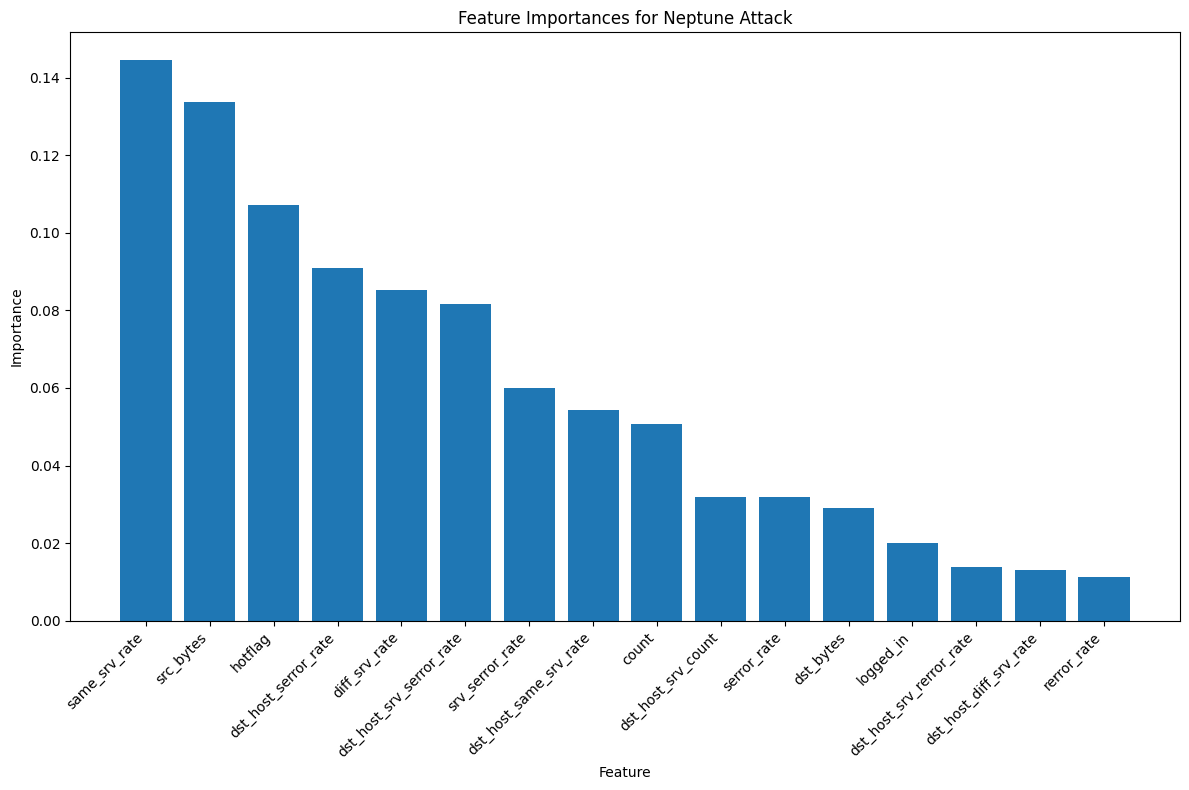

In [55]:
X_binary_neptune = filtered_data_neptune.drop(['Label', 'BinaryLabel','duration','protocol_type','service','flag','MultiLabel','OriginalLabel'], axis=1)
y_binary_neptune = filtered_data_neptune['MultiLabel']

# Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_binary_neptune, y_binary_neptune)

# Feature selection for both binary
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_binary_neptune, y_binary_neptune)

# Get the feature importances
feature_importances = rf.feature_importances_

# Get the selected features
selected_features = X_binary_neptune.columns[sfm.get_support()]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_binary_neptune.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar graph for selected features
selected_feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]
plt.figure(figsize=(12, 8))
plt.bar(selected_feature_importance_df['Feature'], selected_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Neptune Attack')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

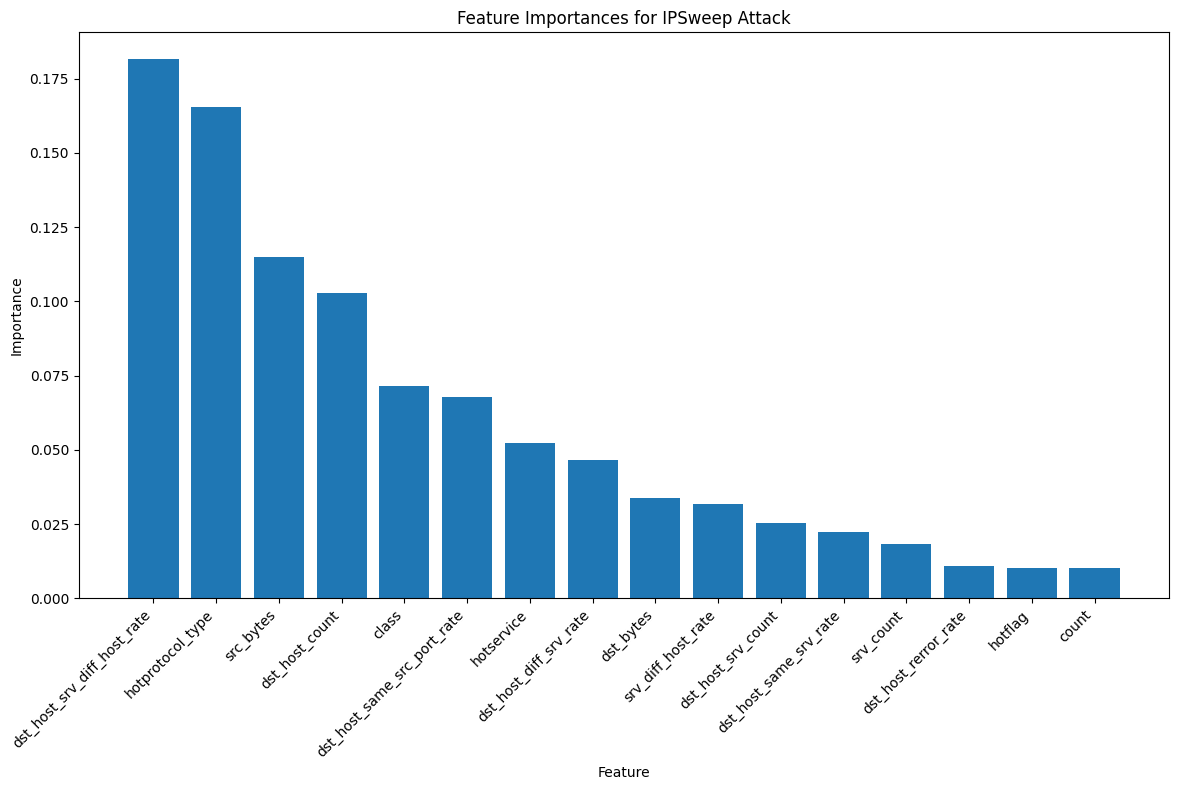

In [56]:
X_binary_ipsweep = filtered_data_ipsweep.drop(['Label', 'BinaryLabel','duration','protocol_type','service','flag','MultiLabel','OriginalLabel'], axis=1)
y_binary_ipsweep = filtered_data_ipsweep['MultiLabel']

# Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_binary_ipsweep, y_binary_ipsweep)

# Feature selection for both binary
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_binary_ipsweep, y_binary_ipsweep)

# Get the feature importances
feature_importances = rf.feature_importances_

# Get the selected features
selected_features = X_binary_ipsweep.columns[sfm.get_support()]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_binary_ipsweep.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar graph for selected features
selected_feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]
plt.figure(figsize=(12, 8))
plt.bar(selected_feature_importance_df['Feature'], selected_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for IPSweep Attack')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

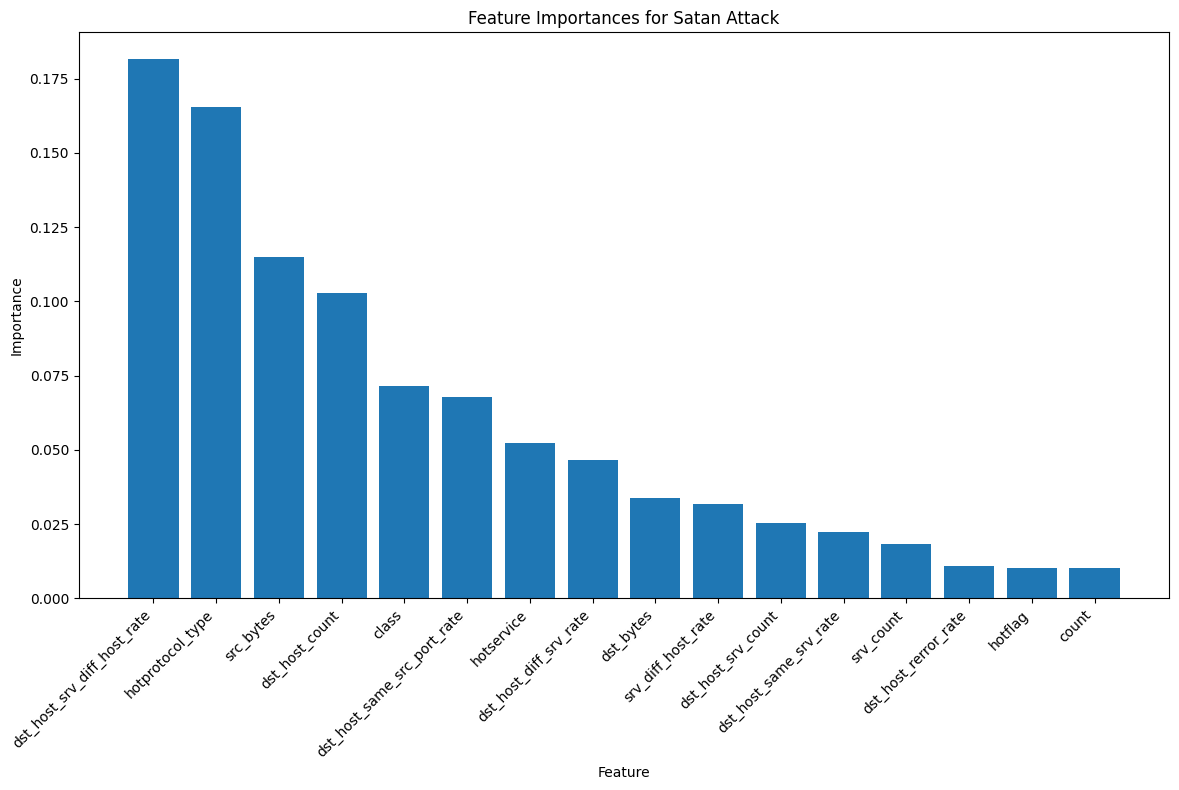

In [57]:
X_binary_satan = filtered_data_ipsweep.drop(['Label', 'BinaryLabel','duration','protocol_type','service','flag','MultiLabel','OriginalLabel'], axis=1)
y_binary_satan = filtered_data_ipsweep['MultiLabel']

# Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_binary_satan, y_binary_satan)

# Feature selection for both binary
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_binary_satan, y_binary_satan)

# Get the feature importances
feature_importances = rf.feature_importances_

# Get the selected features
selected_features = X_binary_satan.columns[sfm.get_support()]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_binary_satan.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar graph for selected features
selected_feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]
plt.figure(figsize=(12, 8))
plt.bar(selected_feature_importance_df['Feature'], selected_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Satan Attack')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

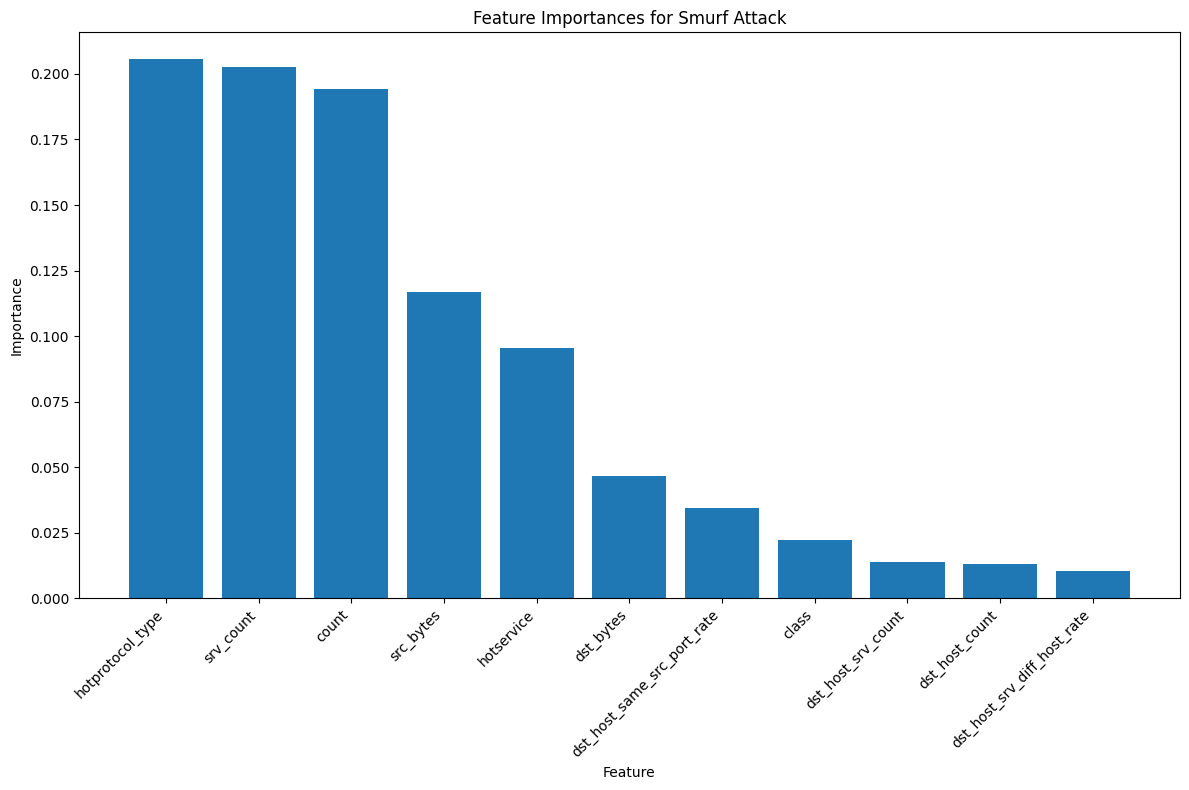

In [58]:
X_binary_smurf = filtered_data_smurf.drop(['Label', 'BinaryLabel','duration','protocol_type','service','flag','MultiLabel','OriginalLabel'], axis=1)
y_binary_smurf = filtered_data_smurf['MultiLabel']

# Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_binary_smurf, y_binary_smurf)

# Feature selection for both binary
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_binary_smurf, y_binary_smurf)

# Get the feature importances
feature_importances = rf.feature_importances_

# Get the selected features
selected_features = X_binary_smurf.columns[sfm.get_support()]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_binary_smurf.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar graph for selected features
selected_feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]
plt.figure(figsize=(12, 8))
plt.bar(selected_feature_importance_df['Feature'], selected_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Smurf Attack')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

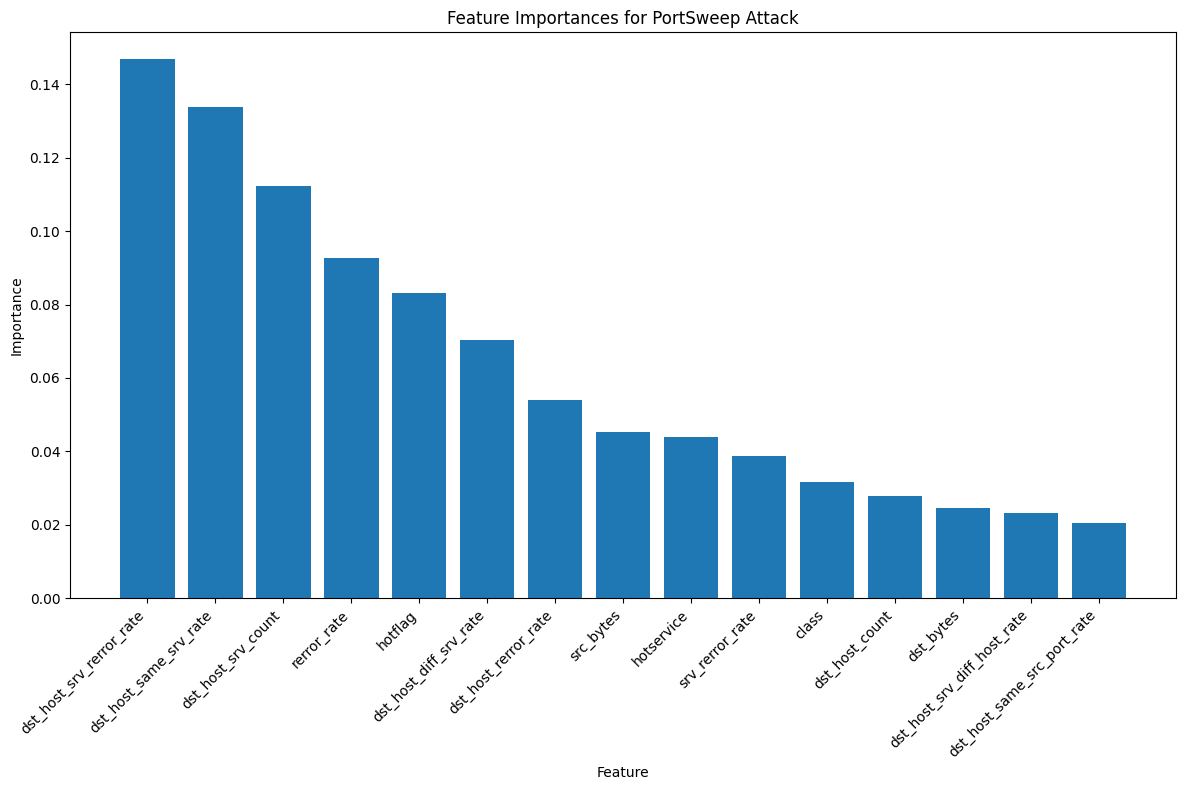

In [59]:
X_binary_portsweep = filtered_data_portsweep.drop(['Label', 'BinaryLabel','duration','protocol_type','service','flag','MultiLabel','OriginalLabel'], axis=1)
y_binary_portsweep = filtered_data_portsweep['MultiLabel']

# Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_binary_portsweep, y_binary_portsweep)

# Feature selection for both binary
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_binary_portsweep, y_binary_portsweep)

# Get the feature importances
feature_importances = rf.feature_importances_

# Get the selected features
selected_features = X_binary_portsweep.columns[sfm.get_support()]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_binary_portsweep.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar graph for selected features
selected_feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]
plt.figure(figsize=(12, 8))
plt.bar(selected_feature_importance_df['Feature'], selected_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for PortSweep Attack')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()